# 空白で区切られた固有名詞のある文字列を分割


**分割対象の制約**
- 全角空白が3つまたは4つのデータのみが存在している
   - 全角空白が2つの`'ほげ　ふが　ほげら太郎'`や全角空白が5つある`'ほげ　ふが23　ぴよ　ほげら花子　1984　fuga23'`のようなテキストがない
- 全角空白で分割したときに，左側2つと右側2つは必ず存在している
   - `'ほげ　ふが　ほげら太郎　42'`のとき，
      > ほげ / ふが / ほげら太郎 / 42

      のように分割されて，左側2つには「ほげ」と「ふが」が存在し，右側2つには「ほげら太郎j」と「42」が存在している．
   - `'ほげ　ふが23　ぴよ　ほげら花子　1729'`のとき， 
      > ほげ / ふが23 / ぴよ / ほげら花子 / 1729 
      
      のように分割されて，左側2つには「ほげ」と「ふが23」が存在し，右側2つには「ほげら花子」と「1729」が存在している
   - `'ほげ　ふが　42'` や `'ほげら太郎　42'` ，`'ほげ　ふが'` のようなデータは存在しない



In [1]:
import pandas as pd
import japanize_matplotlib

In [2]:
texts = [
    'ほげ　ふが　ほげら太郎　42',
    'ほげ　ふが23　ぴよ　ほげら花子　1729',
    'ほげ　ふが23　ぴよ　ほげら花子　1984',
]

In [3]:

texts_splited = {
    "hoge" : [],
    "fuga" : [],
    "piyo" : [],
    "hogera" : [],
    "hogehoge" : [],
}
for text in texts:
    spl = text.split('　')
    spl_len = len(spl)
    if spl_len == 5:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append(spl[2])
        texts_splited["hogera"].append(spl[3])
        texts_splited["hogehoge"].append(spl[4])
    elif spl_len == 4:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append('None')
        texts_splited["hogera"].append(spl[2])
        texts_splited["hogehoge"].append(spl[3])

df = pd.DataFrame(texts_splited, columns=texts_splited.keys())

In [4]:
df

,hoge,fuga,piyo,hogera,hogehoge
0,ほげ,ふが,None,ほげら太郎,42
1,ほげ,ふが23,ぴよ,ほげら花子,1729
2,ほげ,ふが23,ぴよ,ほげら花子,1984


<Axes: xlabel='fuga'>

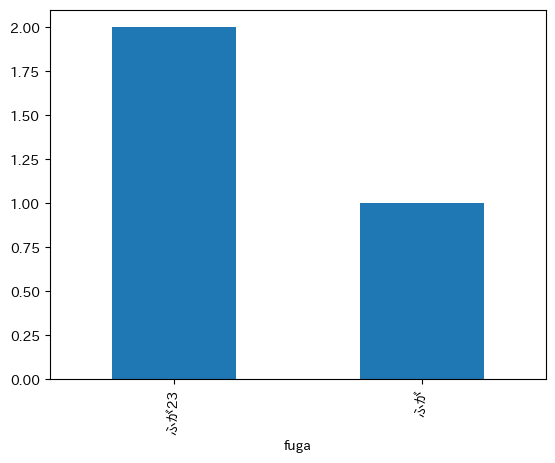

In [5]:
df['fuga'].value_counts().plot(kind='bar')

## プログラムの解説

In [6]:
import pandas as pd
import japanize_matplotlib

分割した結果は`dict`型になるので，
結果を見やすくするために`pandas.DataFrame`を使用します．
可視化するときに，日本語を表示したいので`japanize_matplotlib`をインポートします．


In [7]:
texts = [
    'ほげ　ふが　ほげら太郎　42',
    'ほげ　ふが23　ぴよ　ほげら花子　1729',
    'ほげ　ふが23　ぴよ　ほげら花子　1984',
]

解説で扱うサンプルデータはこの3つのテキストです．
`list`型の変数`texts`に分割対象のテキストを複数格納しています．

実践するときには，`pandas.DataFrame`型の変数`df`を用意して，
`df['列名'].unique()`の結果を変数`texts`の変わりに使うことになると思います．


In [8]:
texts_splited = {
    "hoge" : [],
    "fuga" : [],
    "piyo" : [],
    "hogera" : [],
    "hogehoge" : [],
}

`dict`型の変数`texts_splited`に分割した結果を格納します．
この辞書のバリューは`list`型で，この`list`型に分割した結果を追加します．
分割した対象がない場合は`'None'`を追加します．

この`dict`型の変数`texts_splited`の前提は，バリューに次のような値を格納することです．
- キー`hoge`は変数`texts`にある「ほげ」を追加
- キー`fuga`は変数`texts`にある「ふが」または「ふが23」を追加
- キー`piyo`は変数`texts`にある「ぴよ」を追加
- キー`hogera`は変数`texts`にある「ほげら太郎」または「ほげら花子」を追加
- キー`hogehoge`は変数`texts`にある「42」または「1729」を追加

In [9]:
for text in texts:
    spl = text.split('　')
    spl_len = len(spl)
    if spl_len == 5:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append(spl[2])
        texts_splited["hogera"].append(spl[3])
        texts_splited["hogehoge"].append(spl[4])
    elif spl_len == 4:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append('None')
        texts_splited["hogera"].append(spl[2])
        texts_splited["hogehoge"].append(spl[3])

続いて，forループを解説します．


In [10]:
# 解説のために変数`texts_splited`を初期化
texts_splited = {
    "hoge" : [],
    "fuga" : [],
    "piyo" : [],
    "hogera" : [],
    "hogehoge" : [],
}

In [11]:
text = texts[0]
text

'ほげ\u3000ふが\u3000ほげら太郎\u300042'

変数`text`に`'ほげ\u3000ふが\u3000ほげら太郎\u300042'`が代入されている状況で説明します．


In [12]:
spl = text.split('　')
spl

['ほげ', 'ふが', 'ほげら太郎', '42']

`str`型の`split()`メソッドを使って，`'ほげ\u3000ふが\u3000ほげら太郎\u300042'`を全角空白で分割します．
分割した結果は`list`型になっていて，変数`spl`に代入します．


In [13]:
spl_len = len(spl)
spl_len

4

`len()`関数の戻り値は変数`spl_len`に代入します．
`spl_len`は分割した結果の変数`spl`の長さ 4 を保持しています．


In [14]:
# if spl_len == 5:

このif文は変数`spl_len`の値で処理を分岐しています．
変数`spl_len`の値は4だから`False`になります．
よって，このif文のブロックは実行されないです．


In [15]:
# elif spl_len == 4:

`if spl_len == 5:`のif文が`False`だったので，このelif文の条件を満たすかを判定します．
変数`spl_len`の値は4だから`True`となり，このelif文のブロックが実行されます．


In [16]:
texts_splited["hoge"].append(spl[0])
texts_splited

{'hoge': ['ほげ'], 'fuga': [], 'piyo': [], 'hogera': [], 'hogehoge': []}

`dict`型の変数`texts_splited`において，キーが`hoge`の`list`型のバリューに分割した結果の変数`spl`の添え字が0の要素`'ほげ'`を追加しています．


In [17]:
texts_splited["fuga"].append(spl[1])
texts_splited

{'hoge': ['ほげ'], 'fuga': ['ふが'], 'piyo': [], 'hogera': [], 'hogehoge': []}

同様にして，分割した結果の変数`spl`の添え字が1の要素を`dict`型の変数`texts_splited`のキーが`fuga`の`list`型のバリューに追加します．


In [18]:
texts_splited["piyo"].append('None')
texts_splited

{'hoge': ['ほげ'],
 'fuga': ['ふが'],
 'piyo': ['None'],
 'hogera': [],
 'hogehoge': []}

ここでは`'None'`を追加しています．
変数`spl_len`の値は4になっており`texts_splited["piyo"]`に追加できるテキストがないからです．

> `'ほげ　ふが23　ぴよ　ほげら花子　1729'`を全角空白で分割する場合
>
> 分割した結果の変数`spl`の長さは 5 になります．
> `ぴよ`を`texts_splited["piyo"]`に追加します．


In [19]:
texts_splited["hogera"].append(spl[2])
texts_splited["hogehoge"].append(spl[3])
texts_splited

{'hoge': ['ほげ'],
 'fuga': ['ふが'],
 'piyo': ['None'],
 'hogera': ['ほげら太郎'],
 'hogehoge': ['42']}

`texts_splited["hogera"]`と`texts_splited["hogehoge"]`は追加できるテキストがあるので，それぞれ`ほげら太郎`と`42`を追加しています．


for文のブロックを解説しました．
このfor文を実行することで，下記のような結果になります．


In [20]:
# 解説のために変数`texts_splited`を初期化
texts_splited = {
    "hoge" : [],
    "fuga" : [],
    "piyo" : [],
    "hogera" : [],
    "hogehoge" : [],
}

for text in texts:
    spl = text.split('　')
    spl_len = len(spl)
    if spl_len == 5:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append(spl[2])
        texts_splited["hogera"].append(spl[3])
        texts_splited["hogehoge"].append(spl[4])
    elif spl_len == 4:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append('None')
        texts_splited["hogera"].append(spl[2])
        texts_splited["hogehoge"].append(spl[3])

In [21]:
texts_splited

{'hoge': ['ほげ', 'ほげ', 'ほげ'],
 'fuga': ['ふが', 'ふが23', 'ふが23'],
 'piyo': ['None', 'ぴよ', 'ぴよ'],
 'hogera': ['ほげら太郎', 'ほげら花子', 'ほげら花子'],
 'hogehoge': ['42', '1729', '1984']}

全角空白で分割した結果を`dict`型の変数`texts_splited`に格納した結果が得られました．
この結果を利用しやすくするために，`pandas.DataFrame`型にします．


In [22]:
df = pd.DataFrame(texts_splited, columns=texts_splited.keys())
df

,hoge,fuga,piyo,hogera,hogehoge
0,ほげ,ふが,None,ほげら太郎,42
1,ほげ,ふが23,ぴよ,ほげら花子,1729
2,ほげ,ふが23,ぴよ,ほげら花子,1984


`pandas.DataFrame`型にすることで，結果を確認しやすくなったと思います．
こうすることで，次のように可視化も行えます．


<Axes: xlabel='fuga'>

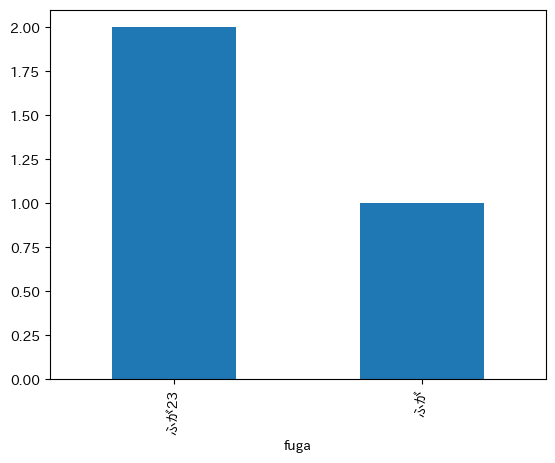

In [23]:
df['fuga'].value_counts().plot(kind='bar')

## 【拡張】分割する項目を追加する場合

In [24]:
texts = [
    'ほげ　ふが　ほげら太郎　42',
    'ほげ　ふが23　ぴよ　ほげら花子　1729',
    'ほげ　ふが23　ぴよ　ほげら花子　1984',
    'ほげ　ふが23　ぴよ　ほげら花子　1984　fuga23',
    'ほげ　ふが23　ぴよ　ほげら花子　1984　fuga42',
    ]

In [25]:

texts_splited = {
    "hoge" : [],
    "fuga" : [],
    "piyo" : [],
    "hogera" : [],
    "hogehoge" : [],
    "fugafuga" : [],  # 追加
}
for text in texts:
    spl = text.split('　')
    spl_len = len(spl)
    if spl_len == 5:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append(spl[2])
        texts_splited["hogera"].append(spl[3])
        texts_splited["hogehoge"].append(spl[4])
   
        texts_splited["fugafuga"].append('None')  # 追加

    elif spl_len == 4:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append('None')
        texts_splited["hogera"].append(spl[2])
        texts_splited["hogehoge"].append(spl[3])
   
        texts_splited["fugafuga"].append('None')  # 追加

    # 追加
    elif spl_len == 6:
        texts_splited["hoge"].append(spl[0])
        texts_splited["fuga"].append(spl[1])
        texts_splited["piyo"].append(spl[2])
        texts_splited["hogera"].append(spl[3])
        texts_splited["hogehoge"].append(spl[4])
        texts_splited["fugafuga"].append(spl[5])

df = pd.DataFrame(texts_splited, columns=texts_splited.keys())


In [26]:
df

,hoge,fuga,piyo,hogera,hogehoge,fugafuga
0,ほげ,ふが,None,ほげら太郎,42,None
1,ほげ,ふが23,ぴよ,ほげら花子,1729,None
2,ほげ,ふが23,ぴよ,ほげら花子,1984,None
3,ほげ,ふが23,ぴよ,ほげら花子,1984,fuga23
4,ほげ,ふが23,ぴよ,ほげら花子,1984,fuga42
